Index(['Country', 'Year', 'Adolescent Birth Rate', 'CO2 Emissions per Capita',
       'Coeff of HI', 'Expected Years of Schooling', 'GDI', 'GII',
       'GNI per Capita', 'HDI', 'Life Expectancy at Birth',
       'Maternal Mortality Ratio per 10k Live Births',
       'Mean Years of Schooling', 'Continent'],
      dtype='object', name='Indicator')


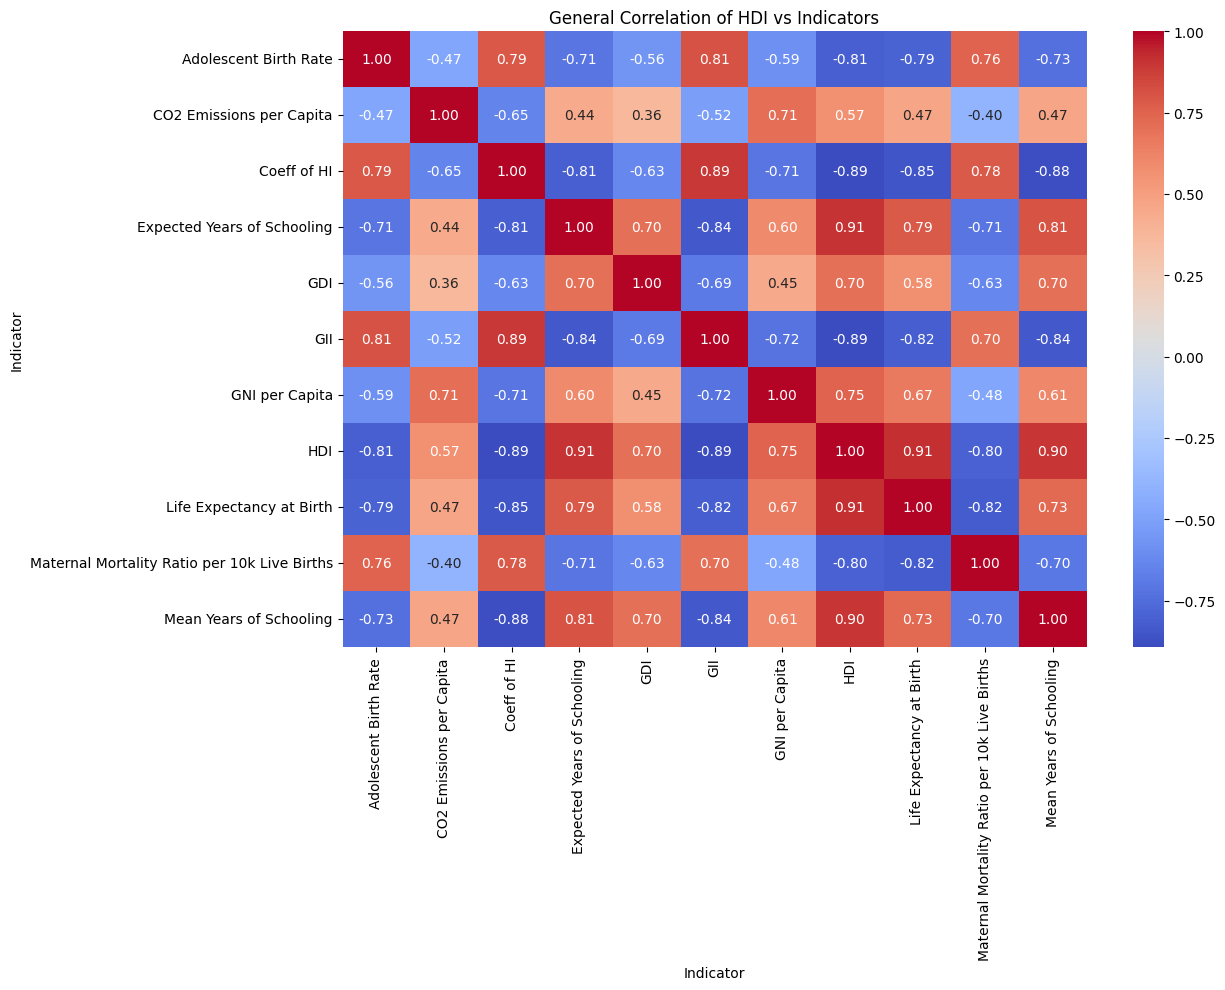

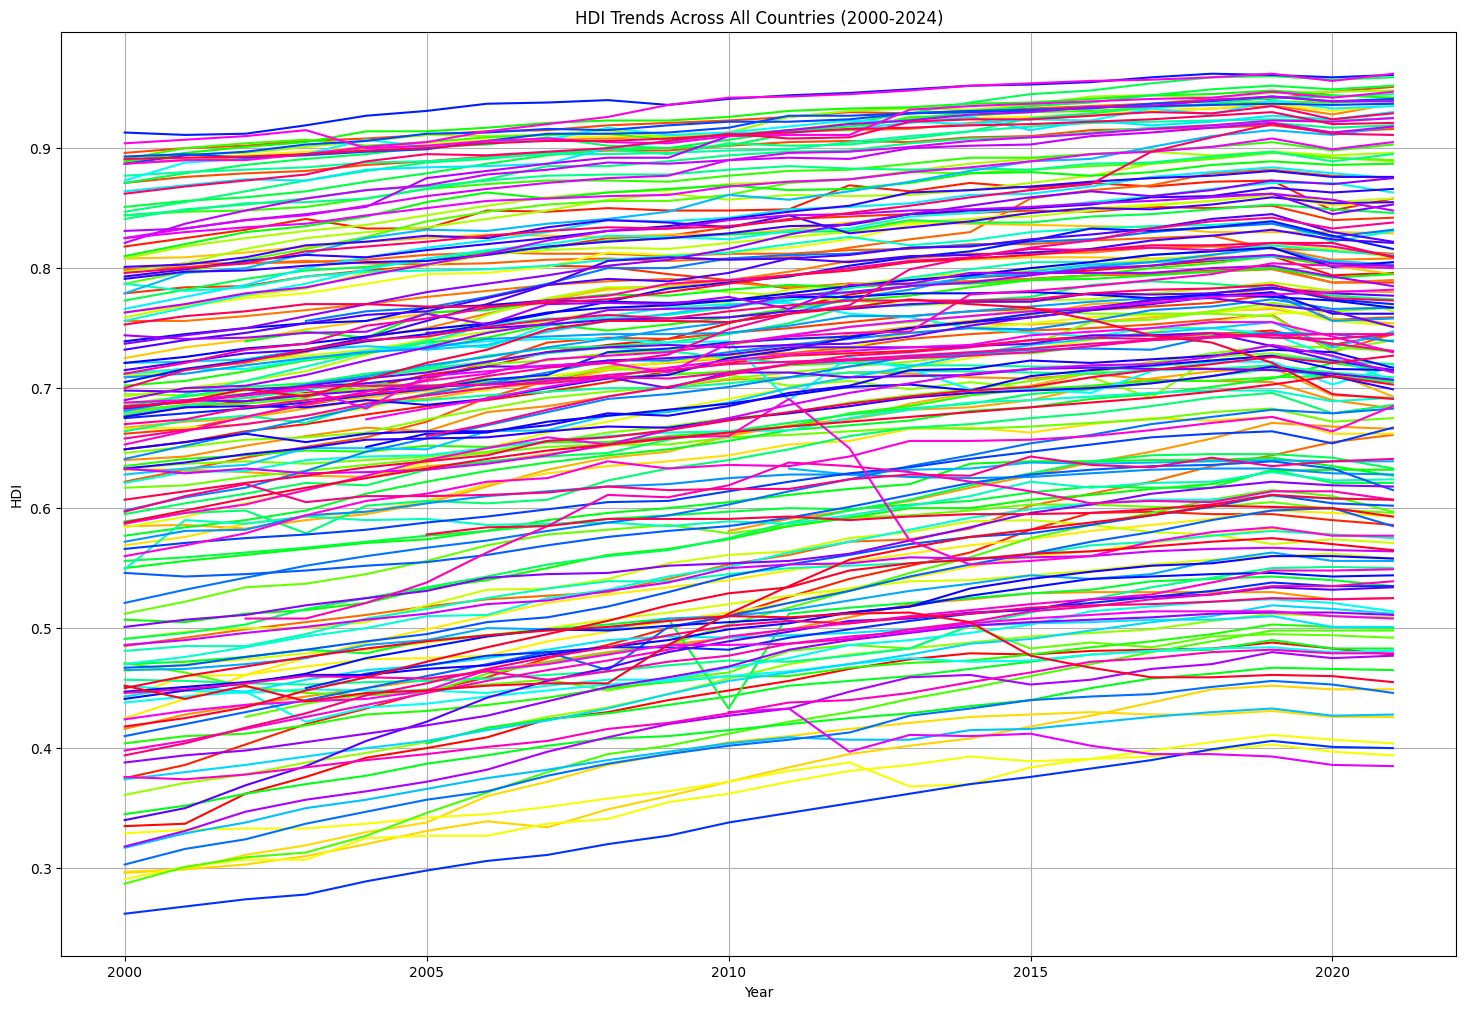

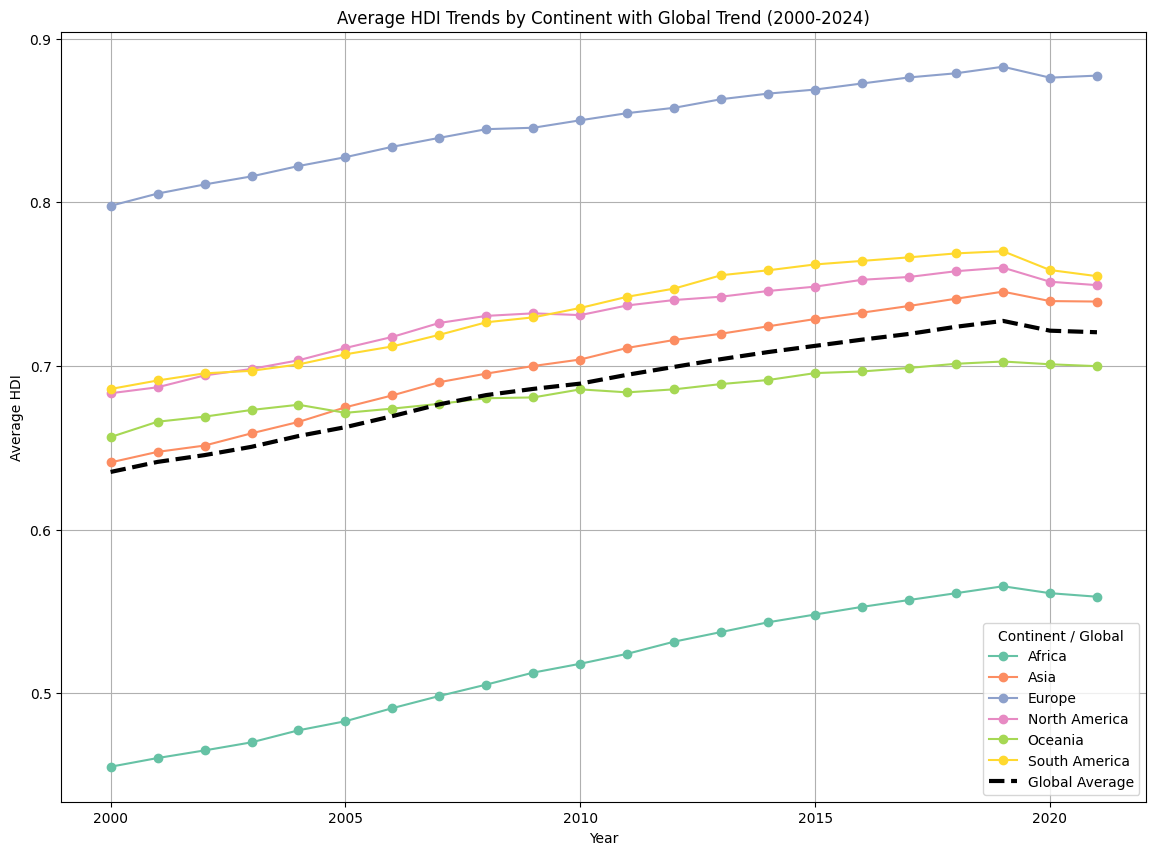

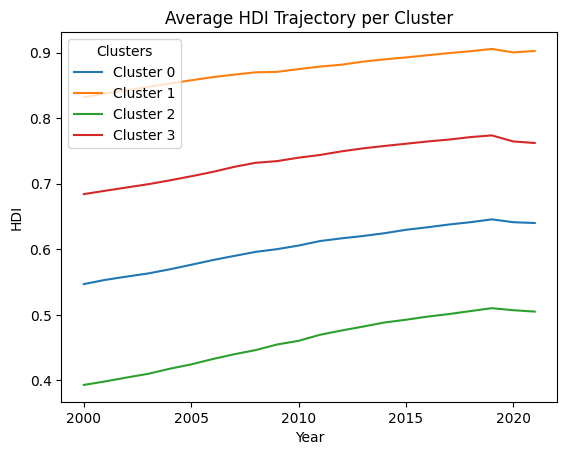

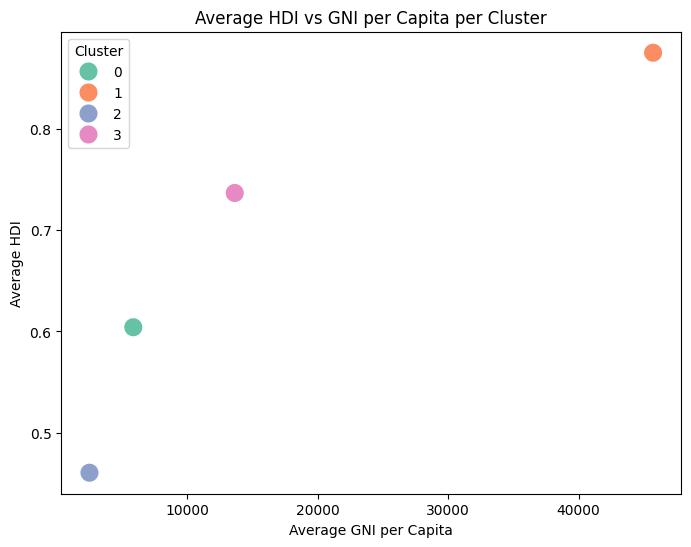

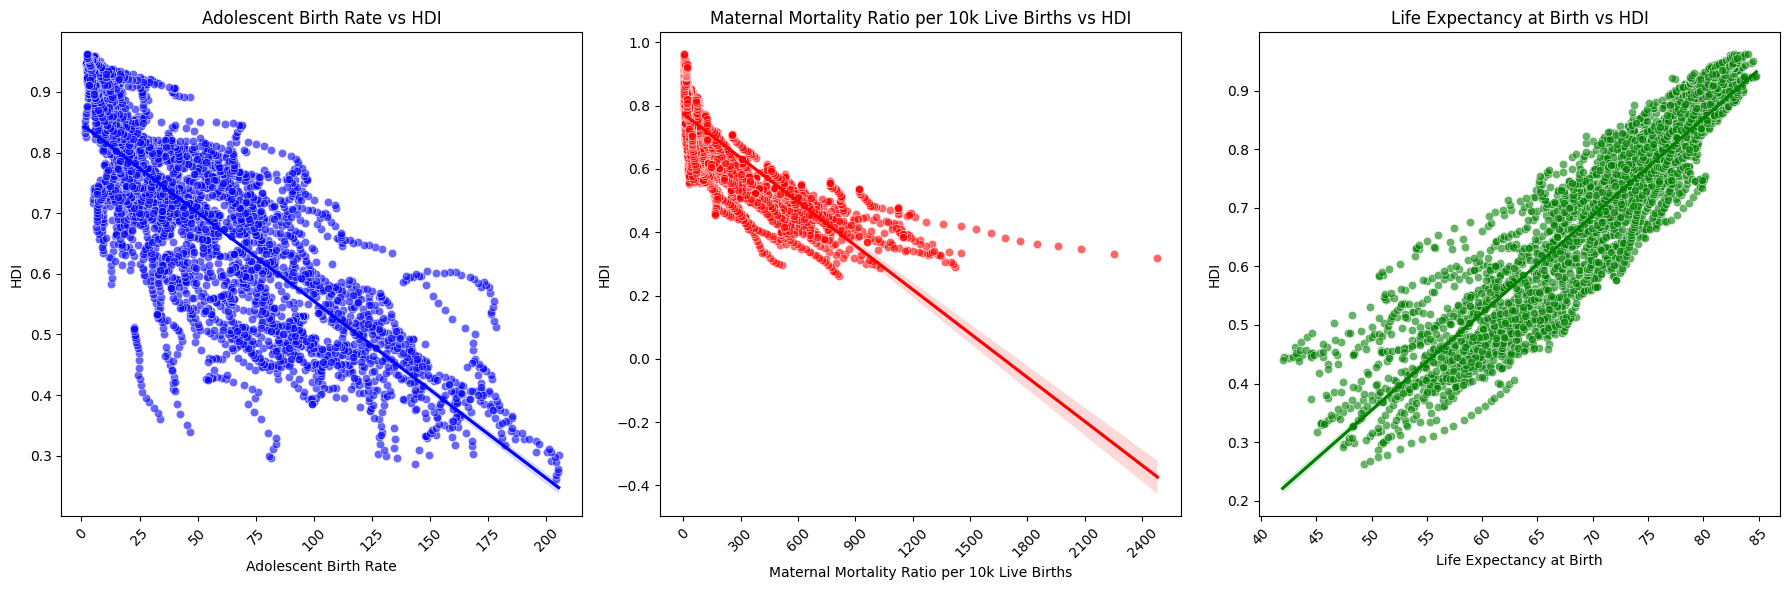

                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        06:12:16   Log-Likelihood:                 4368.0
No. Observations:                1680   AIC:                            -8714.
Df Residuals:                    1669   BIC:                            -8654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

/tmp/ipython-input-631143242.py:478: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace([np.inf, -np.inf], np.nan)


In [31]:
# Kevin Lin
# DAT 402
# Project 2
# 12/5/2025

#libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mticker
import statsmodels.api as sm

#upload .csv file, read file and show preview
df = pd.read_csv("/content/Human Development Index - Full.csv")
#df.head()
#df.info()
#print(df.columns)

#### clean and reshape data ####

# make a copy
df_long = df.copy()


# melting all columns into long format
df_long = df_long.melt(id_vars=["Country"], var_name="Variable", value_name="Value")

# extract year from columns and convert from string to int
df_long['Year'] = df_long['Variable'].str.extract(r'\((\d{4})\)')
df_long = df_long.dropna(subset=['Year'])
df_long['Year'] = df_long['Year'].astype(int)
df_long['Indicator'] = df_long['Variable'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# list of columns i'm dropping
cols_to_keep = [
    "Adolescent Birth Rate (births per 1,000 women ages 15-19)",
    "Carbon dioxide emissions per capita (production) (tonnes)",
    "Coefficient of human inequality",
    "Expected Years of Schooling",
    "Gender Development Index",
    "Gender Inequality Index",
    "Gross National Income Per Capita",
    "Human Development Index",
    "Inequality Adjusted Human Development Index",
    "Life Expectancy at Birth",
    "Maternal Mortality Ratio (deaths per 100,000 live births)",
    "Mean Years of Schooling",
    "Planetary pressures-adjusted Human Development Index'"
]

df_filtered = df_long[df_long['Indicator'].isin(cols_to_keep)]

#filter years i want to analyze
df_filtered = df_filtered[df_filtered['Year'] >= 2000]

df_clean = df_filtered.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Value').reset_index()


# mapping rename of variables
mapping_rename = {
    "Adolescent Birth Rate (births per 1,000 women ages 15-19)": "Adolescent Birth Rate",
    "Carbon dioxide emissions per capita (production) (tonnes)": "CO2 Emissions per Capita",
    "Coefficient of human inequality": "Coeff of HI",
    "Expected Years of Schooling": "Expected Years of Schooling",
    "Gender Development Index": "GDI",
    "Gender Inequality Index": "GII",
    "Gross National Income Per Capita": "GNI per Capita",
    "Human Development Index": "HDI",
    "Inequality Adjusted Human Development Index": "IAHDI",
    "Life Expectancy at Birth": "Life Expectancy at Birth",
    "Maternal Mortality Ratio (deaths per 100,000 live births)": "Maternal Mortality Ratio per 10k Live Births",
    "Mean Years of Schooling": "Mean Years of Schooling",
    "Planetary pressures-adjusted Human Development Index'": "PPAHDI"
}
df_clean.rename(columns=mapping_rename, inplace=True)

# mapping countries to continents
continent_map = {
    'Afghanistan': 'Asia',
    'Angola': 'Africa',
    'Albania': 'Europe',
    'Andorra': 'Europe',
    'United Arab Emirates': 'Asia',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Antigua and Barbuda': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Burundi': 'Africa',
    'Belgium': 'Europe',
    'Benin': 'Africa',
    'Burkina Faso': 'Africa',
    'Bangladesh': 'Asia',
    'Bulgaria': 'Europe',
    'Bahrain': 'Asia',
    'Bahamas': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Belarus': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Barbados': 'North America',
    'Brunei': 'Asia',
    'Bhutan': 'Asia',
    'Botswana': 'Africa',
    'Central African Republic': 'Africa',
    'Canada': 'North America',
    'Switzerland': 'Europe',
    'Chile': 'South America',
    'China': 'Asia',
    'Ivory Coast': 'Africa',
    'Cameroon': 'Africa',
    'The Democratic Republic of the Congo': 'Africa',
    'Congo': 'Africa',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Cabo Verde': 'Africa',
    'Costa Rica': 'North America',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Germany': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Algeria': 'Africa',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'Eritrea': 'Africa',
    'Spain': 'Europe',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'Fiji': 'Oceania',
    'France': 'Europe',
    'Micronesia': 'Oceania',
    'Gabon': 'Africa',
    'United Kingdom': 'Europe',
    'Georgia': 'Europe',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Gambia': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guyana': 'South America',
    'Hong Kong': 'Asia',
    'Honduras': 'North America',
    'Croatia': 'Europe',
    'Haiti': 'North America',
    'Hungary': 'Europe',
    'Indonesia': 'Asia',
    'India': 'Asia',
    'Ireland': 'Europe',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Iceland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Jordan': 'Asia',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Cambodia': 'Asia',
    'Kiribati': 'Oceania',
    'Saint Kitts and Nevis': 'North America',
    'South Korea': 'Asia',
    'Kuwait': 'Asia',
    'Lao': 'Asia',
    'Lebanon': 'Asia',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Saint Lucia': 'North America',
    'Liechtenstein': 'Europe',
    'Sri Lanka': 'Asia',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Latvia': 'Europe',
    'Morocco': 'Africa',
    'Monaco': 'Europe',
    'Moldova': 'Europe',
    'Madagascar': 'Africa',
    'Maldives': 'Asia',
    'Mexico': 'North America',
    'Marshall Islands': 'Oceania',
    'North Macedonia': 'Europe',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Myanmar': 'Asia',
    'Montenegro': 'Europe',
    'Mongolia': 'Asia',
    'Mozambique': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Nicaragua': 'North America',
    'Netherlands': 'Europe',
    'Norway': 'Europe',
    'Nepal': 'Asia',
    'Nauru': 'Oceania',
    'New Zealand': 'Oceania',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Poland': 'Europe',
    'North Korea': 'Asia',
    'Portugal': 'Europe',
    'Paraguay': 'South America',
    'Palestine, State of': 'Asia',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saudi Arabia': 'Asia',
    'Sudan': 'Africa',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Solomon Islands': 'Oceania',
    'Sierra Leone': 'Africa',
    'El Salvador': 'North America',
    'San Marino': 'Europe',
    'Somalia': 'Africa',
    'Serbia': 'Europe',
    'South Sudan': 'Africa',
    'Sao Tome and Principe': 'Africa',
    'Suriname': 'South America',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Sweden': 'Europe',
    'Eswatini': 'Africa',
    'Seychelles': 'Africa',
    'Syrian Arab Republic': 'Asia',
    'Chad': 'Africa',
    'Togo': 'Africa',
    'Thailand': 'Asia',
    'Tajikistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Timor-Leste': 'Asia',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Tuvalu': 'Oceania',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'Uruguay': 'South America',
    'United States': 'North America',
    'Uzbekistan': 'Asia',
    'Saint Vincent and the Grenadines': 'North America',
    'Venezuela': 'South America',
    'Viet Nam': 'Asia',
    'Vanuatu': 'Oceania',
    'Samoa': 'Oceania',
    'Yemen': 'Asia',
    'South Africa': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}
df_clean['Continent'] = df_clean['Country'].map(continent_map)

# drop missing HDI values
df_clean = df_clean.dropna(subset=['HDI']).reset_index(drop=True)
print(df_clean.columns)
df_clean.head()

#### data analysis ####

#list of indicators to reference for analysis
indicators = [
    'Adolescent Birth Rate',
    'CO2 Emissions per Capita',
    'Coeff of HI',
    'Expected Years of Schooling',
    'GDI',
    'GII',
    'GNI per Capita',
    'HDI',
    'Life Expectancy at Birth',
    'Maternal Mortality Ratio per 10k Live Births',
    'Mean Years of Schooling'
]


# correlation map of indicators in general
df_numeric = df_clean[indicators]

correlations = df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("General Correlation of HDI vs Indicators")
plt.show()

# hdi trend over time - all countries
countries = df_clean['Country'].unique()
num_countries = len(countries)

palette = sns.color_palette("hsv", num_countries)

plt.figure(figsize=(18,12))

for i, country in enumerate(countries):
    subset = df_clean[df_clean['Country'] == country]
    plt.plot(subset['Year'], subset['HDI'], color=palette[i], label=country)

plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('HDI Trends Across All Countries (2000-2024)')
plt.grid(True)

# hdi trend over time - by continent
continent_avg = df_clean.groupby(['Continent', 'Year'])['HDI'].mean().reset_index()

global_avg = df_clean.groupby('Year')['HDI'].mean().reset_index()

continents = continent_avg['Continent'].dropna().unique()
palette = sns.color_palette("Set2", len(continents))
continent_colors = dict(zip(continents, palette))

plt.figure(figsize=(14,10))

for continent in continents:
    subset = continent_avg[continent_avg['Continent'] == continent]
    plt.plot(subset['Year'], subset['HDI'], color=continent_colors[continent], marker='o', label=continent)

plt.plot(global_avg['Year'], global_avg['HDI'], color='black', linewidth=3, linestyle='--', label='Global Average')

plt.xlabel('Year')
plt.ylabel('Average HDI')
plt.title('Average HDI Trends by Continent with Global Trend (2000-2024)')
plt.grid(True)
plt.legend(title='Continent / Global')
plt.show()

# kmeans clustering of countries
hdi_matrix = df_clean.pivot(index='Country', columns='Year', values='HDI')

hdi_matrix = hdi_matrix.apply(pd.to_numeric, errors='coerce')

hdi_matrix = hdi_matrix.dropna(how='all')

hdi_matrix = hdi_matrix.interpolate(axis=1, limit_direction='both')

hdi_matrix = hdi_matrix.fillna(hdi_matrix.mean(axis=0))

#print("nans left:", hdi_matrix.isna().sum().sum())

scaler = StandardScaler()
hdi_scaled = scaler.fit_transform(hdi_matrix)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(hdi_scaled)

hdi_matrix['Cluster'] = clusters

cluster_avg = hdi_matrix.groupby('Cluster').mean()

for cluster_id in cluster_avg.index:
    plt.plot(cluster_avg.columns, cluster_avg.loc[cluster_id], label=f'Cluster {cluster_id}')

plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('Average HDI Trajectory per Cluster')
plt.legend(title="Clusters")
plt.show()

"""
for c in sorted(hdi_matrix['Cluster'].unique()):
    print(f"\n=== Cluster {c} ===")
    countries = hdi_matrix[hdi_matrix['Cluster'] == c].index.tolist()
    for country in countries:
        print(" -", country)
"""

#gdp per capita per cluster vs hdi
clusters_df = pd.DataFrame({
    'Country': hdi_matrix.index,
    'Cluster': hdi_matrix['Cluster'].values
})

df_with_clusters = df_clean.merge(clusters_df, on='Country', how='left')

cluster_avg_gni_hdi = df_with_clusters.groupby('Cluster').agg({
    'HDI': 'mean',
    'GNI per Capita': 'mean'
}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=cluster_avg_gni_hdi,
                x='GNI per Capita', y='HDI',
                hue='Cluster', s=200, palette='Set2')

plt.xlabel('Average GNI per Capita')
plt.ylabel('Average HDI')
plt.title('Average HDI vs GNI per Capita per Cluster')
plt.legend(title='Cluster')
plt.show()

#lifespan related factors vs hdi
indicators = [
    'Adolescent Birth Rate',
    'Maternal Mortality Ratio per 10k Live Births',
    'Life Expectancy at Birth'
]

for col in indicators:
    df_clean[col] = df_clean[col].astype(str).str.replace(',', '').str.strip()
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean['HDI'] = pd.to_numeric(df_clean['HDI'], errors='coerce')

df_plot = df_clean.dropna(subset=indicators + ['HDI'])

colors = {
    'Adolescent Birth Rate': 'blue',
    'Maternal Mortality Ratio per 10k Live Births': 'red',
    'Life Expectancy at Birth': 'green'
}

plt.figure(figsize=(18,6))

for i, indicator in enumerate(indicators, 1):
    plt.subplot(1, 3, i)

    sns.scatterplot(data=df_plot, x=indicator, y='HDI', color=colors[indicator], alpha=0.6)
    sns.regplot(data=df_plot, x=indicator, y='HDI', scatter=False, color=colors[indicator])

    plt.title(f'{indicator} vs HDI')
    plt.xlabel(indicator)
    plt.ylabel('HDI')

    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=10))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# regression analysis
indicators = [
    'Adolescent Birth Rate',
    'CO2 Emissions per Capita',
    'Coeff of HI',
    'Expected Years of Schooling',
    'GDI',
    'GII',
    'GNI per Capita',
    'Life Expectancy at Birth',
    'Maternal Mortality Ratio per 10k Live Births',
    'Mean Years of Schooling'
]

X = df_clean[indicators].copy()
y = df_clean['HDI'].copy()

X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)

data_clean = pd.concat([X, y], axis=1).dropna()
X = data_clean[X.columns]
y = data_clean['HDI']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

